In [1]:
import easyocr
import pandas as pd
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np

# pipeline = keras_ocr.pipeline.Pipeline()

reader = easyocr.Reader(['en'], gpu = True)

2024-01-18 17:53:53.331988: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 17:53:53.332158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 17:53:53.337073: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 17:53:53.376468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 17:54:01.637755: W tensorflow/compiler/tf2

In [2]:
receipt_file_name = "pao_de_acucar/pao_de_acucar_3.jpeg"
results = reader.readtext(receipt_file_name)
results

[([[48, 8], [252, 8], [252, 32], [48, 32]],
  "{0U24s0*(6956   DEV FIV nknc4 'Po8n4n",
  0.016520784706611922),
 ([[49, 37], [129, 37], [129, 53], [49, 53]],
  '[iu 440:*Uin',
  0.00825723612569158),
 ([[135, 39], [229, 39], [229, 55], [135, 55]],
  'HeM eull PJIAYM',
  0.038795339908584026),
 ([[226, 28], [262, 28], [262, 56], [226, 56]], "' Yhn", 0.08238768463366536),
 ([[211, 51], [233, 51], [233, 67], [211, 67]], 'do0', 0.258719741657874),
 ([[51, 61], [87, 61], [87, 75], [51, 75]], 'iI4 V6"', 0.0721569325952057),
 ([[107, 61], [129, 61], [129, 75], [107, 75]], '954', 0.0740224851721004),
 ([[135, 61], [193, 61], [193, 77], [135, 77]], 'LH ele', 0.12283745780396979),
 ([[55, 83], [129, 83], [129, 101], [55, 101]],
  '059LQ" , iX',
  0.07291371034392737),
 ([[135, 85], [175, 85], [175, 101], [135, 101]],
  'smuoke',
  0.13719829795571928),
 ([[224, 76], [262, 76], [262, 104], [224, 104]],
  "'AVEIA",
  0.2969463303217211),
 ([[209, 101], [231, 101], [231, 115], [209, 115]],
  'Q00',

In [3]:

easyocr_df = pd.DataFrame(results, columns=['bbox','text','conf'])
easyocr_df.head()

,bbox,text,conf
0,"[[48, 8], [252, 8], [252, 32], [48, 32]]",{0U24s0*(6956 DEV FIV nknc4 'Po8n4n,0.016521
1,"[[49, 37], [129, 37], [129, 53], [49, 53]]",[iu 440:*Uin,0.008257
2,"[[135, 39], [229, 39], [229, 55], [135, 55]]",HeM eull PJIAYM,0.038795
3,"[[226, 28], [262, 28], [262, 56], [226, 56]]",' Yhn,0.082388
4,"[[211, 51], [233, 51], [233, 67], [211, 67]]",do0,0.258720


In [6]:
def plot_compare(img_fn, easyocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 1, figsize=(15, 10))

    # easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = easyocr_df[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]

    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), easy_results, ax=axs[0])
    
    axs[0].set_title('easyocr results', fontsize=24)
    plt.show()

TypeError: 'Axes' object is not subscriptable

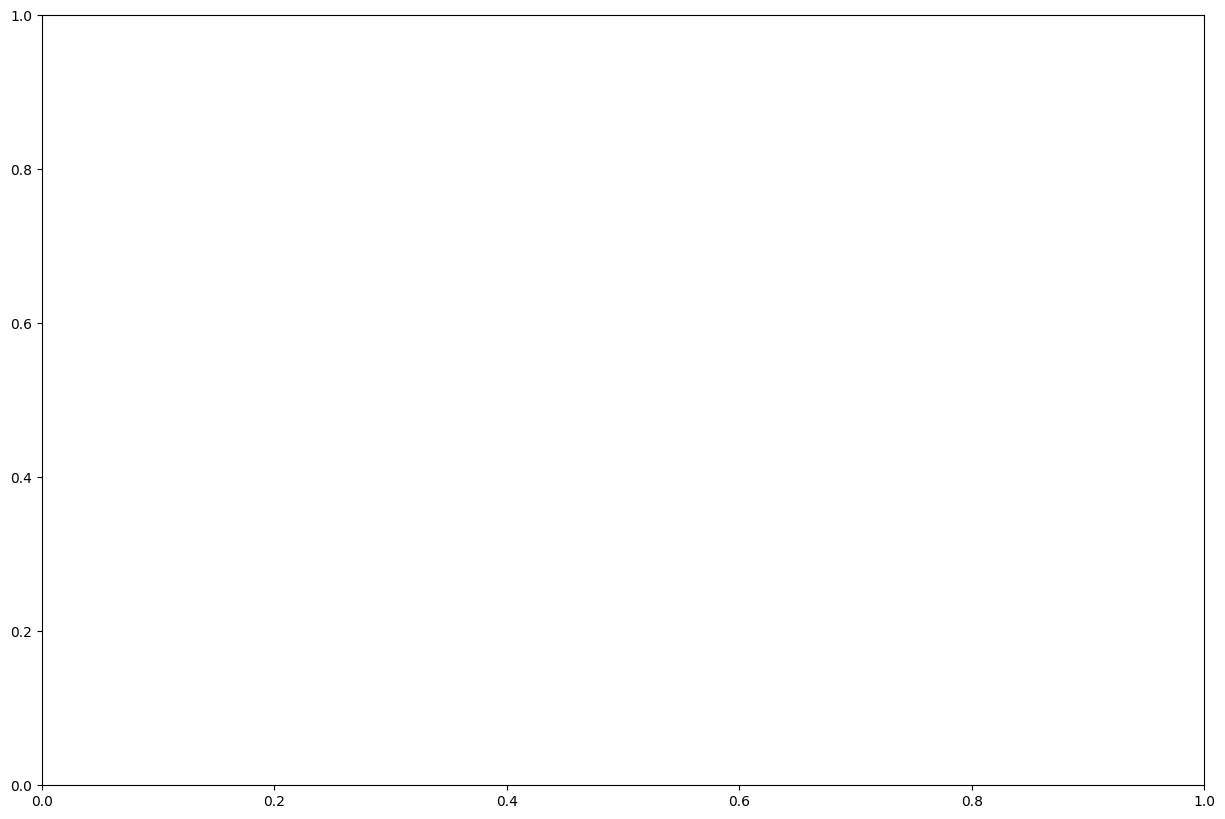

In [7]:
plot_compare(receipt_file_name, easyocr_df)